In [1]:
import nltk  # Python library for NLP
from nltk.corpus import twitter_samples  # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt  # library for visualization
import random  # pseudo-random number generator
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [2]:
nltk.download("twitter_samples")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/arpanmajumdar/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
retweet_pattern = r"^RT[\s]+"
hyperlink_pattern = r"https?://[^\s\n\r]+"

In [4]:
all_positive_tweets = twitter_samples.strings("positive_tweets.json")
all_negative_tweets = twitter_samples.strings("negative_tweets.json")

In [5]:
all_positive_tweets[:5]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days']

In [6]:
all_negative_tweets[:5]

['hopeless for tmr :(',
 "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(",
 '@Hegelbon That heart sliding into the waste basket. :(',
 '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too',
 'Dang starting next week I have "work" :(']

In [7]:
print("Number of positive tweets: ", len(all_positive_tweets))
print("Number of negative tweets: ", len(all_negative_tweets))

print("\nThe type of all_positive_tweets is: ", type(all_positive_tweets))
print("The type of a tweet entry is: ", type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


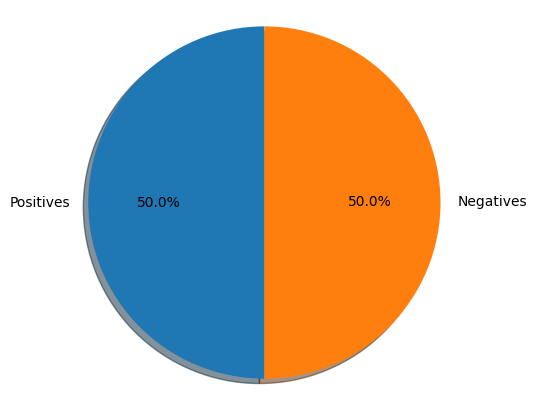

In [8]:
fig = plt.figure(figsize=(5, 5))
labels = "Positives", "Negatives"
sizes = [len(all_positive_tweets), len(all_negative_tweets)]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [9]:
# print positive in greeen
print("\033[92m" + all_positive_tweets[random.randint(0, 5000)])

# print negative in red
print("\033[91m" + all_negative_tweets[random.randint(0, 5000)])

@lucahollic good and you ? :)
@RohYB_ @Glanny_ @_wattie yeah :(


## Preprocessing tweet for sentiment analysis

- Tokenize the string
- Convert to lowercase
- Remove stop words and punctuation
- Stemming

In [10]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arpanmajumdar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
def clean_tweets(text: str) -> str:
    cleaned_text = re.sub(retweet_pattern, "", text)
    cleaned_text = re.sub(hyperlink_pattern, "", cleaned_text)
    cleaned_text = re.sub("#", "", cleaned_text)
    return cleaned_text

In [12]:
text = all_positive_tweets[2277]
cleaned_tweet = clean_tweets(text)
print("Original tweet :", text)
print("Cleaned tweet: ", cleaned_tweet)

Original tweet : My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
Cleaned tweet:  My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


## Tokenize string

In [13]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
tweet_tokens = tokenizer.tokenize(cleaned_tweet)
print("Tokenized string: ", tweet_tokens)

Tokenized string:  ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


## Remove stopwords and punctuation

In [14]:
stopwords_english = stopwords.words("english")
print("Stop words")
print(stopwords_english)
print()
print("Punctuation")
print(string.punctuation)

Stop words
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [15]:
def remove_stopwords_punctuation(tokens: list[str]) -> list[str]:
    return [
        token
        for token in tokens
        if token not in stopwords_english and token not in string.punctuation
    ]

In [16]:
cleaned_tweet_tokens = remove_stopwords_punctuation(tweet_tokens)
print("Cleaned tweet with stop words and punctuations removed")
print(cleaned_tweet_tokens)

Cleaned tweet with stop words and punctuations removed
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


## Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

In [17]:
stemmer = PorterStemmer()


def perform_stemming(tokens: list[str]) -> list[str]:
    return [stemmer.stem(token) for token in tokens]

In [18]:
tweet_tokens_stem = perform_stemming(cleaned_tweet_tokens)
print("Stemmed tweet tokens")
print(tweet_tokens_stem)

Stemmed tweet tokens
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
